### Sectores que han tenido mejor desempeño en los últimos años:

XLB: Materiales básicos

XLC: Comunicaciones

XLY: Consumo discrecional

XLP: Productos básicos de consumo

XLE: Energía

XLF: Finanzas

XLV: Cuidado de la salud

XLI: Industriales

XLK: Tecnología de la información

XLU: Servicios públicos

Son los 10 sectores principales en los que se divide el índice.

Rendimiento Anual (medida útil para comparar el rendimiento de diferentes inversiones en un mismo período de tiempo, como un año, y para estimar el rendimiento que se puede esperar en el futuro)

In [2]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import datetime as dt

In [18]:
# Descargar datos históricos del S&P 500 y de los sectores
tickers = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLU", "XLB"]
data_sect = yf.download(tickers, start="2000-01-01", end="2023-02-23")

[*********************100%***********************]  11 of 11 completed


In [4]:
# Vistazo
data_sect.head(1)

Adj Close                                                 \
                 SPY        XLB XLC       XLE        XLF        XLI   
Date                                                                  
2000-01-03   95.3088  15.398962 NaN  14.83089  11.698808  18.979507   

                                                        ...  Volume      \
                  XLK        XLP        XLU        XLV  ...     XLB XLC   
Date                                                    ...               
2000-01-03  42.209297  13.234909  12.175938  21.571775  ...  140500 NaN   

                                                                            
               XLE      XLF    XLI     XLK     XLP     XLU     XLV     XLY  
Date                                                                        
2000-01-03  380300  1185699  82800  938100  634300  176700  246700  212900  

[1 rows x 66 columns]

In [19]:
# Filtro por Precio Ajustado
returns = data_sect['Adj Close']

In [7]:
#data_sect.to_excel("/content/drive/MyDrive/Giselle PI/Proyecto02/10sectores.xlsx", index=False)

In [20]:
# Calcular el rendimiento anual para cada acción
returns = returns.pct_change().groupby([data_sect.index.year]).mean()
returns

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2000,-0.000256,-0.000423,NaN,1.110767e-03,0.001287,0.000482,-0.001899,0.001080,0.001009,-0.000286,-0.000412
2001,-0.000408,0.000230,NaN,-6.746832e-04,-0.000273,-0.000307,-0.000634,-0.000351,-0.000488,0.000092,0.000652
2002,-0.000827,-0.000052,NaN,-4.658370e-04,-0.000440,-0.000960,-0.001560,-0.000815,-0.001139,0.000102,-0.000654
2003,0.001040,0.001331,NaN,9.621151e-04,0.001134,0.001160,0.001424,0.000457,0.000987,0.000606,0.001340
2004,0.000428,0.000560,NaN,1.223249e-03,0.000439,0.000681,0.000277,0.000312,0.000869,0.000083,0.000514
2005,0.000208,0.000209,NaN,1.471101e-03,0.000267,0.000135,0.000017,0.000127,0.000644,0.000268,-0.000236
2006,0.000606,0.000735,NaN,7.848380e-04,0.000716,0.000534,0.000497,0.000554,0.000781,0.000291,0.000701
2007,0.000250,0.000896,NaN,1.376062e-03,-0.000733,0.000555,0.000626,0.000499,0.000734,0.000305,-0.000525
2008,-0.001477,-0.001853,NaN,-1.206507e-03,-0.002134,-0.001643,-0.001787,-0.000528,-0.001080,-0.000874,-0.001200


In [ ]:
# Actualmente "Date" se encuentra en el índice del DF, asi que lo primero que haré es convertirlo en una columa más
data_sect = returns.reset_index()

In [21]:
# Calcular el rendimiento anual para cada sector
sector_returns = returns.mean()
sector_returns

SPY    0.000356
XLB    0.000428
XLC    0.000603
XLE    0.000413
XLF    0.000395
XLI    0.000392
XLK    0.000421
XLP    0.000312
XLU    0.000305
XLV    0.000316
XLY    0.000540
dtype: float64

In [22]:
# Ordenar los sectores por rendimiento anual promedio
sector_returns.sort_values(ascending=False)

XLC    0.000603
XLY    0.000540
XLB    0.000428
XLK    0.000421
XLE    0.000413
XLF    0.000395
XLI    0.000392
SPY    0.000356
XLV    0.000316
XLP    0.000312
XLU    0.000305
dtype: float64

- Rendimiento Anual:

El mercado en general ha tenido un buen desempeño en este período.

Es importante tener en cuenta que los resultados del rendimiento pasado no garantizan el rendimiento futuro

Obteniendo los sectores con el mejor rendimiento anual desde el año 2000 a la actualidad, ordenados del mejor en adelante

XLC: Comunicaciones

XLY: Consumo discrecional

XLB: Materiales básicos

XLK: Tecnología de la información

XLE: Energía

XLF: Finanzas

XLI: Industriales

XLV: Cuidado de la salud

XLP: Productos básicos de consumo

XLU: Servicios públicos


Rendimiento Total (el rendimiento total es una medida útil para evaluar el rendimiento de una inversión a lo largo de todo el período en que se ha mantenido. Esta medida toma en cuenta todos los cambios en el valor de la inversión, tanto positivos como negativos, y muestra cuánto ha crecido o disminuido el valor de la inversión desde que se inició)

In [23]:
# Descargar datos históricos para rendimiento total
tickers = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLU", "XLB"]
data_sect_tot = yf.download(tickers, start="2000-01-01", end="2023-02-23")

[*********************100%***********************]  11 of 11 completed


In [24]:
# Calcular el rendimiento diario
returns_tot = data_sect_tot['Adj Close'].pct_change()

In [25]:
# Calcular el rendimiento total acumulado desde el inicio de los datos históricos
tot_returns = (1 + returns_tot).cumprod() - 1

In [26]:
# Resultados de las ultimas 5 filas, da una idea de cómo han evolucionado los rendimientos recientemente.
tot_returns.tail(1)

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2023-02-22,3.181566,4.231521,0.129985,4.630817,2.043046,4.290969,2.229146,4.537627,4.497727,5.018978,5.380979


- Rendimiento Total:

La columna "SPY" muestra el rendimiento total acumulado del índice S&P 500

Las demás columnas muestran el rendimiento total acumulado de los distintos sectores. 

Los valores se expresan como un porcentaje, lo que significa que un valor de 1,0 representa un rendimiento total del 100%.

Si ordenamos los sectores desde el mayor rendimiento total en adelante sería:

XLY:Consumo discrecional

XLV:Cuidado de la salud

XLE:Energía

XLP:Productos básicos de consumo

XLU:Servicios públicos

XLI:Industriales

XLB:Materiales básicos

XLK:Tecnología de la información

XLF:Finanzas

XLC:Comunicaciones

Identificar oportunidades de inversión en sectores especificos.

Se debe tener en cuenta que el rendimiento general del mercado de valores de EE. UU. puede influir en el rendimiento del SPY

In [27]:
# Descargar datos históricos para rendimiento total
tickers_sec = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLU", "XLB"]
data_sect_total = yf.download(tickers_sec, start="2000-01-01", end="2023-02-23")

[*********************100%***********************]  10 of 10 completed


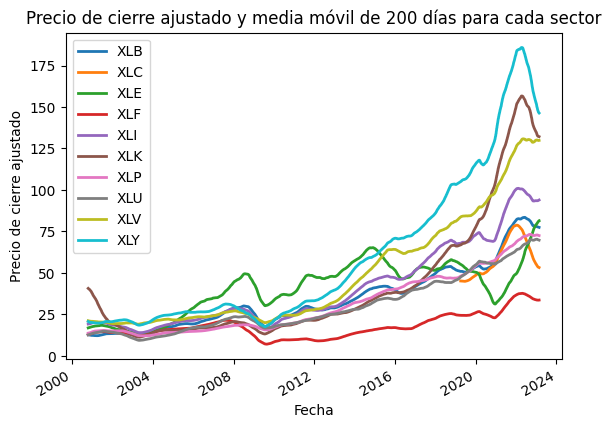

In [28]:
# Visualizar las tendencias de estos sectores a largo plazo
# Calcular la media móvil de 200 días
ma = data_sect_total['Adj Close'].rolling(window=200).mean()

# Visualizar la tendencia del precio de cierre ajustado y la media móvil de 200 días para cada sector
#data_sect_total['Adj Close'].plot(figsize=(10, 5))
ma.plot(label='MA(200)', linewidth=2)

plt.title('Precio de cierre ajustado y media móvil de 200 días para cada sector')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.legend()
plt.show()

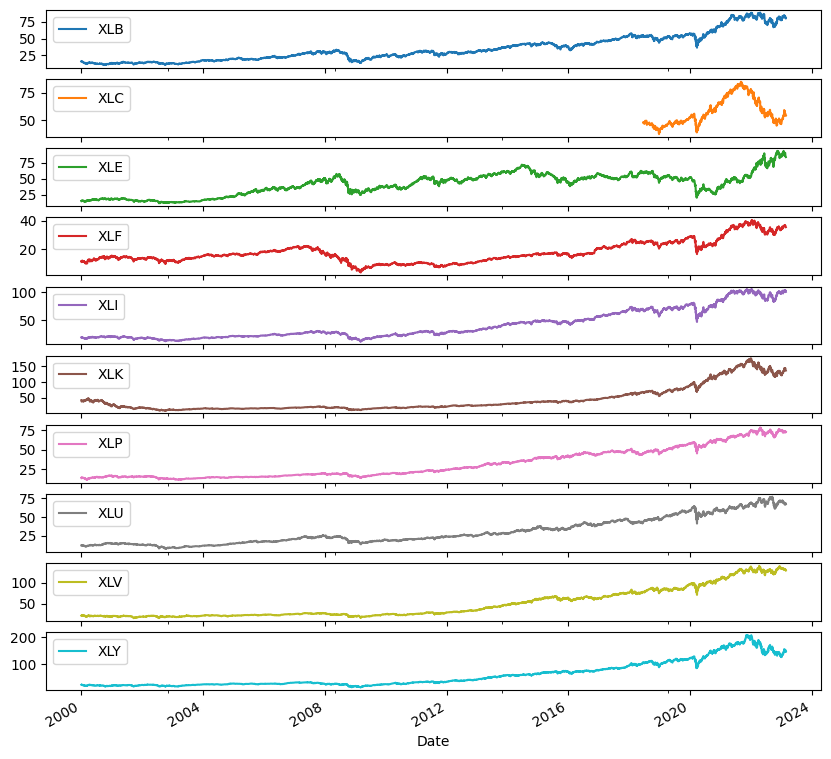

In [29]:
# Visualizar los precios de cierre ajustados para cada sector
data_sect_total['Adj Close'].plot(subplots=True, figsize=(10, 10))
plt.show()

- Conclusión:

Al visualizar los precios de cierre ajustados de cada sector, se pueden identificar patrones y tendencias que pueden indicar oportunidades de inversión, como asi es en:

XLY(Consumo discrecional)

XLK(Tecnología de la información)

XLV(Cuidado de la salud)

XLI(Industriales)

Los cuales han finalizado estos ultimos dás con sus cierres ajustados por encima de los 100.